<a href="https://colab.research.google.com/github/IvanRobotics/LanguageDetectionMLops/blob/master/LanguageDetectionML_FastAPI_Heroku_Docker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re  #it is used for text processing tasks such as looking for patterns in text
import seaborn as sns #it gives data visualization
import matplotlib.pyplot as plt
import pickle #it is used for caching and storing ML models
import warnings
warnings.simplefilter('ignore')

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
# connect to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the data
data = pd.read_csv('/content/drive/MyDrive/AI_Projects/MLops/Language_detection/language_detection.csv')

In [ ]:
data.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [ ]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
# separating the independent and dependant features
X = data['Text']
y = data['Language']


In [ ]:
# convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
le.classes_


array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

# Text Preprocessing

In [ ]:
data_list = []
for text in X:
  text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
  text = re.sub(r'[[]]', ' ', text)
  text = text.lower()
  data_list.append(text)


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_list, y ,test_size=0.20)


# Bag of Words and Model Creation and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


cv = CountVectorizer()
model = MultinomialNB()

pipe = Pipeline([('vectorizer',cv),('multinomialNB',model)])
pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [ ]:
from sklearn.metrics import accuracy_score

# prediction
y_pred2 = pipe.predict(x_test)
ac2 = accuracy_score(y_test, y_pred2)
print('accuracy: ', ac2) 

accuracy:  0.9763056092843327


# Evaluating the model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
cr = classification_report(y_test, y_pred2)

In [ ]:
print('Accuracy: ', ac)

Accuracy:  0.9763056092843327


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       109
           1       1.00      0.94      0.97        85
           2       0.99      0.98      0.98       121
           3       0.88      0.99      0.93       279
           4       0.98      0.98      0.98       199
           5       0.99      0.99      0.99       107
           6       1.00      0.95      0.97        61
           7       1.00      1.00      1.00        11
           8       0.99      0.99      0.99       145
           9       1.00      0.96      0.98        69
          10       1.00      0.99      1.00       120
          11       1.00      0.99      1.00       131
          12       1.00      0.98      0.99       149
          13       0.98      0.98      0.98       169
          14       0.98      0.98      0.98       132
          15       1.00      0.98      0.99        98
          16       1.00      0.88      0.94        83

    accuracy              

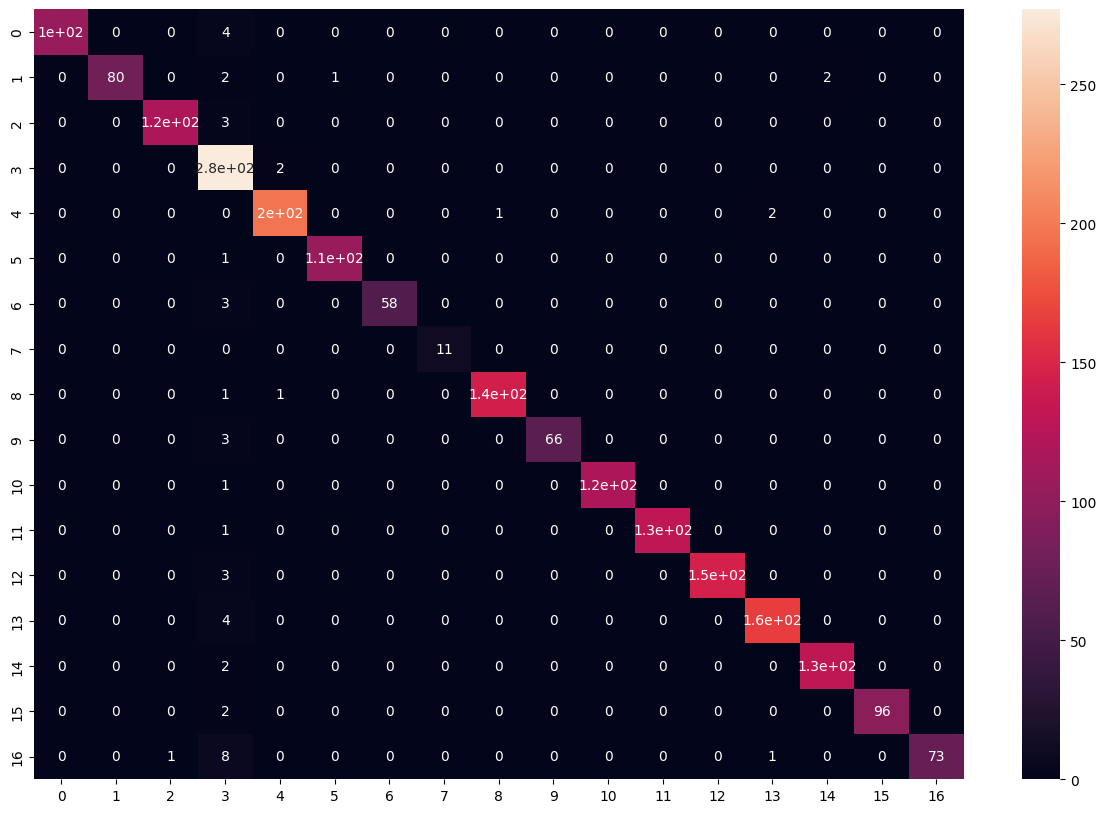

In [ ]:
# visualize the confusion matrix
plt.figure(figsize =(15,10))
sns.heatmap(cm, annot = True)
plt.show()

# Save the Model

In [ ]:
# saving both cv and model 
with open('trained_pipeline-0.3.0.pkl', 'wb') as f:
    pickle.dump((pipe, le.classes_), f)



In [ ]:
# If using tensor flow, then the pickle file will be saved as a while directory, so in this case, we can zip the folder, and then you can download the zip folder
# !zip -r ./trained_pipline-0.1.pkl.zip /content/drive/MyDrive/AI_Projects/MLops/Language_detection/trained_pipline-0.1.pkl

In [ ]:
text ='Hello, how are you?'


y = pipe.predict([text])
le.classes_[y[0]],y

('English', array([3]))